In [1]:
from torchvision import transforms as T
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sentence_transformers import SentenceTransformer, util
from PIL import Image
from skimage.metrics import structural_similarity as ssim

model = SentenceTransformer('clip-ViT-B-32')

/home/pablo/miniconda3/envs/ascii/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [2]:
def extract_patches(image, n, m):  
    patches = []
    image = np.array(image)
    height, width = image.shape[:2]
    images_height =0
    images_width = 0

    for y in range(0, height - n + 1, m):
        images_height += 1
        for x in range(0, width - n + 1, m):  
            images_width += 1          
            patch = image[y:y+n, x:x+n]
            patches.append(patch)
    images_width = images_width//images_height

    return np.array([patch for patch in patches]), images_width, images_height

In [3]:
ascii_imgs, _, _ = extract_patches(Image.open('converted_sit_toyosu.png'), 16, 16)
img = Image.open('sit_toyosu.png')
gray = img.convert('L')
normal_imgs, _, _ = extract_patches(gray, 16, 16)

In [4]:
def score_image(image1, image2):
    encoded_image = model.encode([Image.fromarray(image1),Image.fromarray(image2)], batch_size=128, convert_to_tensor=True)
    processed_images = util.paraphrase_mining_embeddings(encoded_image)
    return processed_images

In [5]:
scores = []

for ascii_img, normal_img in zip(ascii_imgs, normal_imgs):
    scores.append(score_image(ascii_img, normal_img))

In [6]:
scores_ssim = []
for ascii_img, normal_img in zip(ascii_imgs, normal_imgs):
    score, diff = ssim(ascii_img, normal_img, full=True)
    if score < 0:
        score = 0
    scores_ssim.append(score * 100)

In [7]:
for i, score in enumerate(scores_ssim):
    print(f'Image {i} : {score:.2f}%')
    # plt.subplot(1, 2, 1)
    # plt.imshow(ascii_imgs[i], cmap='gray')
    # plt.subplot(1, 2, 2)
    # plt.imshow(normal_imgs[i], cmap='gray')
    # plt.show()

Image 0 : 30.31%
Image 1 : 20.73%
Image 2 : 32.39%
Image 3 : 14.15%
Image 4 : 11.71%
Image 5 : 6.85%
Image 6 : 23.28%
Image 7 : 21.73%
Image 8 : 33.69%
Image 9 : 21.17%
Image 10 : 29.66%
Image 11 : 21.10%
Image 12 : 32.47%
Image 13 : 21.31%
Image 14 : 85.85%
Image 15 : 20.72%
Image 16 : 85.43%
Image 17 : 20.68%
Image 18 : 85.19%
Image 19 : 20.51%
Image 20 : 84.76%
Image 21 : 20.52%
Image 22 : 84.38%
Image 23 : 20.41%
Image 24 : 83.85%
Image 25 : 20.20%
Image 26 : 82.63%
Image 27 : 19.62%
Image 28 : 80.14%
Image 29 : 18.48%
Image 30 : 49.24%
Image 31 : 16.39%
Image 32 : 70.77%
Image 33 : 7.63%
Image 34 : 14.60%
Image 35 : 14.22%
Image 36 : 70.43%
Image 37 : 13.48%
Image 38 : 62.42%
Image 39 : 60.83%
Image 40 : 2.97%
Image 41 : 2.86%
Image 42 : 85.24%
Image 43 : 19.35%
Image 44 : 33.23%
Image 45 : 21.69%
Image 46 : 2.83%
Image 47 : 2.84%
Image 48 : 62.29%
Image 49 : 60.07%
Image 50 : 84.84%
Image 51 : 20.47%
Image 52 : 84.39%
Image 53 : 20.40%
Image 54 : 84.02%
Image 55 : 20.35%
Image 56

In [10]:
for i, score in enumerate(scores):
    print(f'Image {i} : {(score[0][0]*100):.2f}%')
    # plt.subplot(1, 2, 1)
    # plt.imshow(ascii_imgs[i], cmap='gray')
    # plt.subplot(1, 2, 2)
    # plt.imshow(normal_imgs[i], cmap='gray')
    # plt.show()

Image 0 : 87.14%
Image 1 : 87.58%
Image 2 : 86.13%
Image 3 : 91.44%
Image 4 : 82.77%
Image 5 : 87.19%
Image 6 : 86.74%
Image 7 : 89.24%
Image 8 : 88.12%
Image 9 : 88.72%
Image 10 : 88.12%
Image 11 : 87.32%
Image 12 : 86.14%
Image 13 : 87.87%
Image 14 : 89.80%
Image 15 : 86.86%
Image 16 : 90.09%
Image 17 : 86.70%
Image 18 : 89.38%
Image 19 : 86.57%
Image 20 : 89.64%
Image 21 : 86.36%
Image 22 : 89.60%
Image 23 : 86.28%
Image 24 : 89.97%
Image 25 : 85.68%
Image 26 : 88.41%
Image 27 : 86.12%
Image 28 : 87.75%
Image 29 : 85.07%
Image 30 : 89.35%
Image 31 : 87.17%
Image 32 : 90.06%
Image 33 : 88.12%
Image 34 : 87.01%
Image 35 : 86.02%
Image 36 : 88.99%
Image 37 : 86.68%
Image 38 : 88.95%
Image 39 : 89.13%
Image 40 : 84.80%
Image 41 : 84.51%
Image 42 : 88.79%
Image 43 : 86.58%
Image 44 : 89.24%
Image 45 : 89.68%
Image 46 : 86.52%
Image 47 : 85.72%
Image 48 : 90.34%
Image 49 : 89.83%
Image 50 : 90.17%
Image 51 : 86.14%
Image 52 : 90.12%
Image 53 : 85.97%
Image 54 : 90.14%
Image 55 : 86.18%
Im

Image similarity : 24.33%


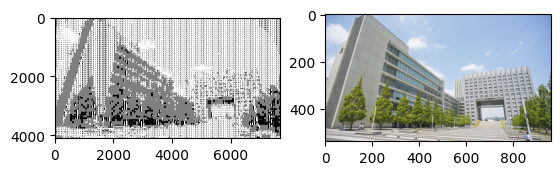

In [11]:
image_mean = np.array(scores_ssim).mean()
print(f'Image similarity : {image_mean:.2f}%')
plt.subplot(1, 2, 1)
plt.imshow(Image.open("converted_sit_toyosu.png"), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.show()

Image similarity : 62.15%


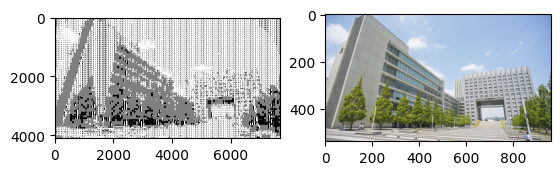

In [13]:
image_mean = np.array(scores).mean()
print(f'Image similarity : {(image_mean*100):.2f}%')
plt.subplot(1, 2, 1)
plt.imshow(Image.open("converted_sit_toyosu.png"), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.show()